# NLP Assignment

## Problem Statement - 55

## Group No : NLP Group 05

## Group Member Names:
1. SUMIL KHOSLA (2021sc04457)
2. RAJNEESH KUMAR (2021sc04455)
3. THAKKAR PRACHI CHETAN CHETNA (2021sc04875)
4. SHRAVYA S KADAM (2021sc04874)

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Exploratory Data Analysis & Data Visualization**

In [ ]:
# Importing dataset (.tsv file)
#df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df = pd.read_csv('/content/drive/MyDrive/NLP/amazon_alexa.tsv', sep='\t')

In [ ]:
df.head()   # Display top 5 records of the dataset

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.shape     # Checking shape of the dataset

(3150, 5)

In [ ]:
df.info()     # Basic information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
df.isnull().sum()   # Checking missing/null values

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

There is no missing values/Null values in the dataset

In [ ]:
df.duplicated().sum()   # Checking duplicates

715

There are 715 duplicate records in the dataset

In [ ]:
df=df.drop_duplicates()   # Removing duplicates

In [ ]:
len(df[df['verified_reviews']==' '])   # No. of records not having review

50

In [ ]:
df = df[df['verified_reviews']!=' ']   # Dropping records having no review

In [ ]:
df.shape     # Shape after removing duplicates & no review records

(2385, 5)

After duplicate removal, No. of attributes/column: 5, No. of rows/records: 2385

In [ ]:
df['feedback'].value_counts()

1    2179
0     206
Name: feedback, dtype: int64

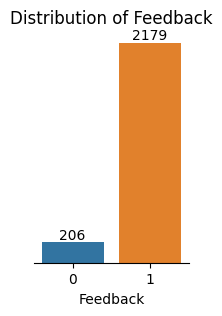

In [ ]:
# Plotting distribution of attribute "feedback"

fig, ax = plt.subplots(figsize=(2,3))
feedbacks = sns.countplot(data=df, x=df["feedback"])  # Countplot
for i in feedbacks.containers:
  feedbacks.bar_label(i, )            # Bar label
plt.title("Distribution of Feedback", fontsize=12)    # Plot title
plt.xlabel("Feedback", fontsize=10)   # X-axis label
plt.ylabel("Count", fontsize=10)      # Y-axis label
ax.spines['right'].set_color('None')  # Removing right border
ax.spines['top'].set_color('None')    # Removing top border
ax.spines['left'].set_color('None')   # Removing left border
ax.get_yaxis().set_visible(False)     # Hiding y-axis
plt.show()

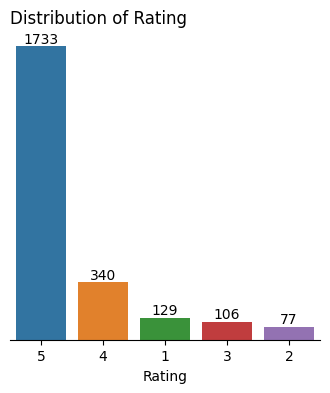

In [ ]:
# Plotting distribution of attribute "rating"

fig, ax = plt.subplots(figsize=(4,4))
rating = sns.countplot(data=df, x=df["rating"], order=df["rating"].value_counts().index)    # Countplot in descending order
for i in rating.containers:
  rating.bar_label(i, )               # Bar label
plt.title("Distribution of Rating", fontsize=12, loc='left')    # Plot title
plt.xlabel("Rating", fontsize=10)     # X-axis label
plt.ylabel("Count", fontsize=10)      # Y-axis label
ax.spines['right'].set_color('None')  # Removing right border
ax.spines['top'].set_color('None')    # Removing top border
ax.spines['left'].set_color('None')   # Removing left border
ax.get_yaxis().set_visible(False)     # Hiding y-axis
plt.show()

Observation:
1. Most of the reviews have very good ratings.
2. 1733 reviews got rating-5 and 340 got rating-4.

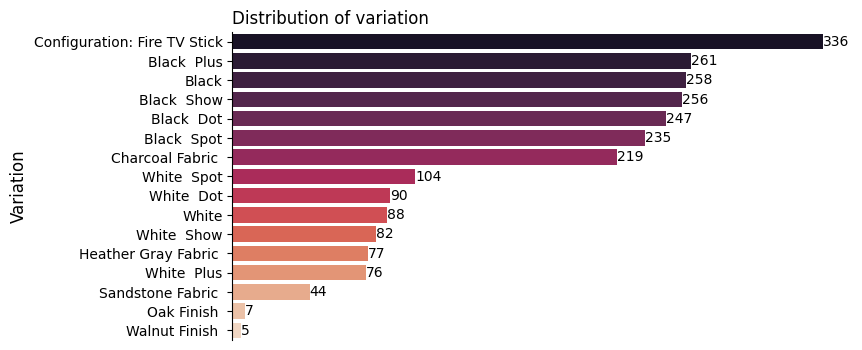

In [ ]:
# Plotting distribution of attribute "Variation"

fig, ax = plt.subplots(figsize=(8,4))
variation = sns.countplot(data=df, y=df["variation"], order=df["variation"].value_counts().index, palette="rocket")   #Countplot in descending order
for i in variation.containers:
  variation.bar_label(i, )            # Bar label
plt.title("Distribution of variation", fontsize=12, loc='left')   # Plot title
plt.xlabel("Count", fontsize=12)      # X-axis label
plt.ylabel("Variation", fontsize=12)  # Y-axis label
ax.spines['right'].set_color('None')  # Removing right border
ax.spines['top'].set_color('None')    # Removing top border
ax.spines['bottom'].set_color('None') # Removing bottom border
ax.get_xaxis().set_visible(False)     # Hiding x-axis
plt.show()

**Observations:**
1. Most of the reviews are related to product Fire TV stick: 336.
2. Black Plus, Back, Black show, Black dot, Black spot & Charcoal fabric have more than 200 reviews.

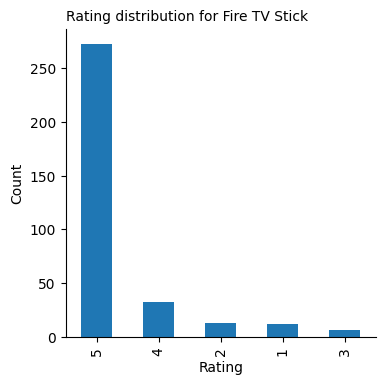

In [ ]:
# Plot Rating distribution for "Fire TV Stick"

fig, ax = plt.subplots(figsize=(4,4))
df[df['variation']=='Configuration: Fire TV Stick']['rating'].value_counts().plot(kind='bar')
plt.title("Rating distribution for Fire TV Stick", fontsize=10, loc='left')
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Count", fontsize=10)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.show()

**Observation**: "Fire TV stick" has very good rating (rating-5).

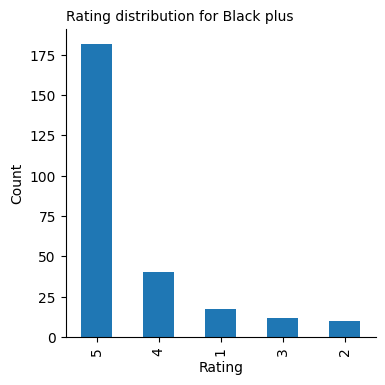

In [ ]:
# Plot Rating distribution for "Black Plus"

fig, ax = plt.subplots(figsize=(4,4))
df[df['variation']=='Black  Plus']['rating'].value_counts().plot(kind='bar')
plt.title("Rating distribution for Black plus", fontsize=10, loc='left')
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Count", fontsize=10)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.show()

**Observation**: "Black plus" has very good rating (rating-5).

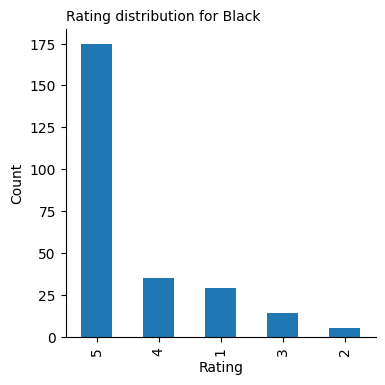

In [ ]:
# Plot Rating distribution for "Black"

fig, ax = plt.subplots(figsize=(4,4))
df[df['variation']=='Black']['rating'].value_counts().plot(kind='bar')
plt.title("Rating distribution for Black", fontsize=10, loc='left')
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Count", fontsize=10)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.show()

**Observation**: "Black" product has very good rating (rating-5).

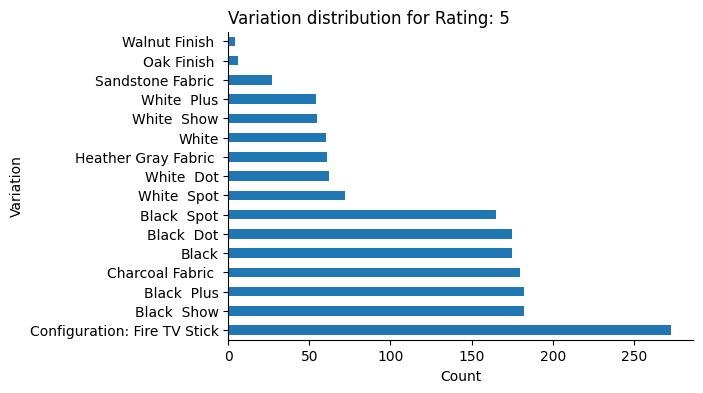

In [ ]:
# Plot Variation distribution for "Rating: 5"

fig, ax = plt.subplots(figsize=(6,4))
df[df['rating']==5]["variation"].value_counts().plot(kind='barh')
plt.title("Variation distribution for Rating: 5", fontsize=12, loc='left')
plt.xlabel("Count", fontsize=10)
plt.ylabel("Variation", fontsize=10)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.show()

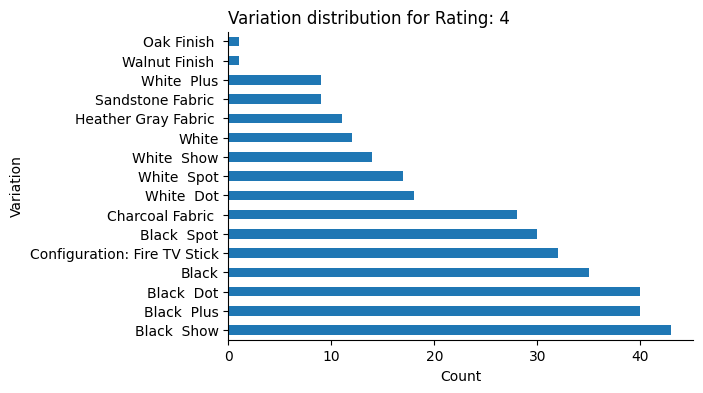

In [ ]:
# Plot Variation distribution for "Rating: 4"

fig, ax = plt.subplots(figsize=(6,4))
df[df['rating']==4]["variation"].value_counts().plot(kind='barh')
plt.title("Variation distribution for Rating: 4", fontsize=12, loc='left')
plt.xlabel("Count", fontsize=10)
plt.ylabel("Variation", fontsize=10)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.show()

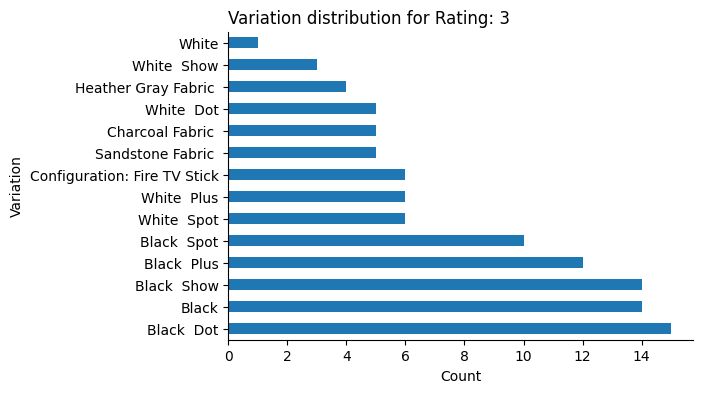

In [ ]:
# Plot Variation distribution for "Rating: 3"

fig, ax = plt.subplots(figsize=(6,4))
df[df['rating']==3]["variation"].value_counts().plot(kind='barh')
plt.title("Variation distribution for Rating: 3", fontsize=12, loc='left')
plt.xlabel("Count", fontsize=10)
plt.ylabel("Variation", fontsize=10)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
plt.show()

### 2. Data Cleaning

Transforming all reviews to lowercase, Remove HTML Tags, remove stopwords and punctuations

In [ ]:
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Remove stopwords and punctuation
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and not word in stop_words]

    return ' '.join(words)

df['verified_reviews'] = df['verified_reviews'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-27-c147dd28e243>:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-27-c147dd28e243>:16: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### 3. Performing lemmatization and word cloud for positive reviews

In [ ]:
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['verified_reviews'] = df['verified_reviews'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


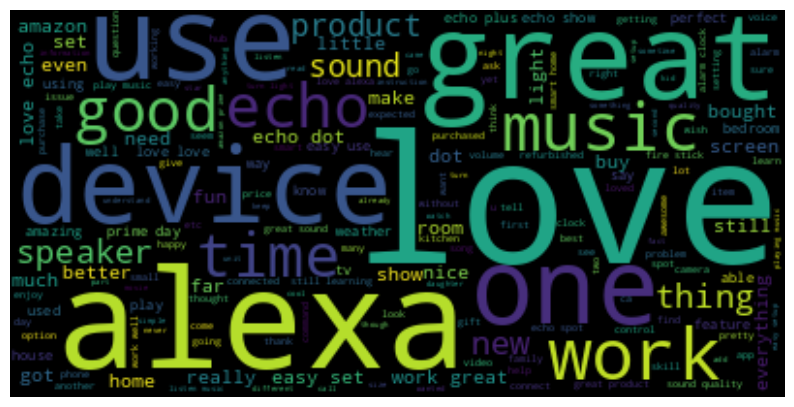

In [ ]:
# Create wordcloud for positive reviews
positive_reviews = ' '.join(df[df['feedback']==1]['verified_reviews'].tolist())
wordcloud = WordCloud().generate(positive_reviews)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4. Building the Feed Forward Network Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense

# Create bag of words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['verified_reviews']).toarray()
y = df['feedback']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/10
191/191 [==============================] - 2s 4ms/step - loss: 0.5166 - accuracy: 0.8789 - val_loss: 0.3972 - val_accuracy: 0.9119
Epoch 2/10
191/191 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.9151 - val_loss: 0.2980 - val_accuracy: 0.9161
Epoch 3/10
191/191 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.9376 - val_loss: 0.2420 - val_accuracy: 0.9182
Epoch 4/10
191/191 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9575 - val_loss: 0.2281 - val_accuracy: 0.9245
Epoch 5/10
191/191 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9665 - val_loss: 0.2247 - val_accuracy: 0.9287
Epoch 6/10
191/191 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9727 - val_loss: 0.2307 - val_accuracy: 0.9266
Epoch 7/10
191/191 [==============================] - 1s 4ms/step - loss: 0.0646 - accuracy: 0.9775 - val_loss: 0.2317 - val_accuracy: 0.9245
Epoch 

#### Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Evaluating model performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of Model:", accuracy)
print("Classification Report:\n", report)


15/15 [==============================] - 0s 2ms/step
Accuracy of Model: 0.9203354297693921
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.24      0.34        42
           1       0.93      0.99      0.96       435

    accuracy                           0.92       477
   macro avg       0.78      0.61      0.65       477
weighted avg       0.90      0.92      0.90       477



Our model seems to be performing well with an overall accuracy of approximately 93%. However, it seems to be performing better on class 1 than on class 0. This is evident from the higher precision, recall, and f1-score for class 1 compared to class 0.

-    Precision tells us what proportion of predicted Positive instances are truly Positive.
-   Recall (Sensitivity) tells us what proportion of actual Positive instances are correctly predicted as such.
-    F1-Score is the harmonic mean of precision and recall and serves as a combined metric.

In our case, the model seems to be predicting class 1 (Positive sentiment) more accurately than class 0 (Negative sentiment). This is possibly because there are more positive reviews than negative reviewsin our dataset. This imbalance can cause our model to be biased towards the majority class (positive reviews in this case).

To tackle this issue, we will try oversampling the minority class, using a technique called SMOTE (Synthetic Minority Over-sampling Technique), which synthesizes new examples in the minority class.

#### Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Now split the data again
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the new balanced data
history = model.fit(X_train_sm, y_train_sm, epochs=10, batch_size=10, validation_data=(X_test_sm, y_test_sm))

Epoch 1/10
349/349 [==============================] - 2s 3ms/step - loss: 0.5548 - accuracy: 0.8219 - val_loss: 0.4084 - val_accuracy: 0.8911
Epoch 2/10
349/349 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.9088 - val_loss: 0.2900 - val_accuracy: 0.9094
Epoch 3/10
349/349 [==============================] - 1s 2ms/step - loss: 0.2091 - accuracy: 0.9343 - val_loss: 0.2584 - val_accuracy: 0.9163
Epoch 4/10
349/349 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.9489 - val_loss: 0.2479 - val_accuracy: 0.9151
Epoch 5/10
349/349 [==============================] - 1s 2ms/step - loss: 0.1285 - accuracy: 0.9573 - val_loss: 0.2486 - val_accuracy: 0.9255
Epoch 6/10
349/349 [==============================] - 1s 3ms/step - loss: 0.1069 - accuracy: 0.9679 - val_loss: 0.2491 - val_accuracy: 0.9220
Epoch 7/10
349/349 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9733 - val_loss: 0.2631 - val_accuracy: 0.9266
Epoch 

#### Model Evaluation after applying SMOTE

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Evaluating model performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of Model:", accuracy)
print("Classification Report:\n", report)


15/15 [==============================] - 0s 2ms/step
Accuracy of Model: 0.9224318658280922
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.79      0.64        42
           1       0.98      0.94      0.96       435

    accuracy                           0.92       477
   macro avg       0.76      0.86      0.80       477
weighted avg       0.94      0.92      0.93       477



As we can see, oversampling the minority class with SMOTE seems to have improved our model's ability to predict negative reviews. This showcases the importance of handling class imbalance in our dataset.

#### Prediction

In [ ]:
# Preprocess the new, unseen reviews
unseen_reviews = ["Best Choice go for it", "Good choice should buy", "I suggest not to buy it"]
X_new = vectorizer.transform(unseen_reviews)

# Predict the sentiment for new reviews
new_predictions = model.predict(X_new)
new_predictions = (new_predictions > 0.5)

for review, prediction in zip(unseen_reviews, new_predictions):
    print("Review:", review)
    print("Sentiment:", "Positive" if prediction == 1 else "Negative")
    print()

1/1 [==============================] - 0s 91ms/step
Review: Best Choice go for it
Sentiment: Positive

Review: Good choice should buy
Sentiment: Positive

Review: I suggest not to buy it
Sentiment: Negative



### 5. Create a Graph of Accuracy VS Loss

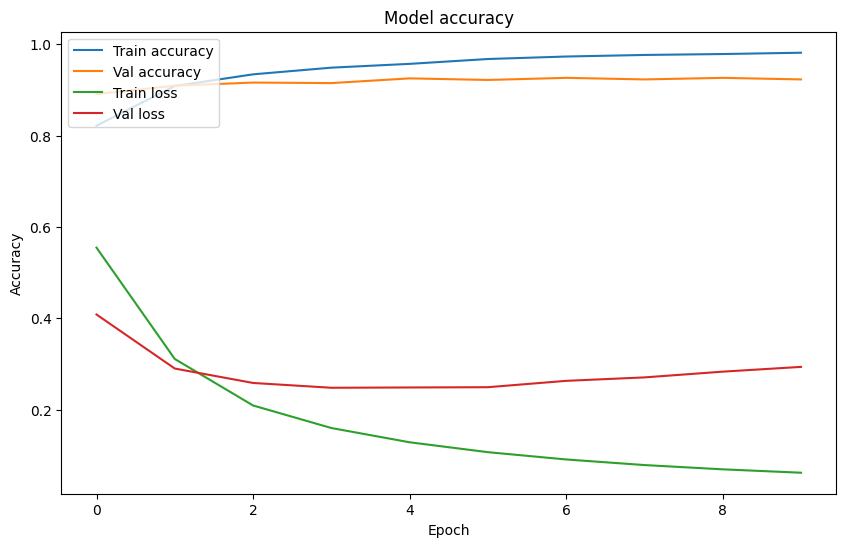

In [ ]:
# Training and Validation Accuracy vs Loss
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy', 'Train loss', 'Val loss'], loc='upper left')
plt.show()




**Observations**:

-    **Training Accuracy**: This is increasing over time, until it reaches a high value close to 1. If it doesn't increase, our model might not be learning effectively.

-    **Validation Accuracy**: Broadly it is following the same pattern as training accuracy. However, if it would have started to decrease after a certain point (while training accuracy continues to increase), this could have indicated overfitting. That would have meant the our model is learning the training data too well, including its noise, and this is hurting its ability to generalize to new data.

-    **Training Loss**: This is decreasing over time until it reaches a small value close to 0. If it doesn't decrease, or if it starts to increase, it would have indicated that there might be an issue with our model or learning rate.

-    **Validation Loss**: This is following the same pattern as the training loss. But, if it starts to increase after a certain point (while training loss continues to decrease), this would have been a sign of overfitting.

Our final goal is to find a model that performs well not just on the training data, but also on unseen data. Balancing the bias-variance trade-off is a fundamental step in machine learning. If your model suffers from high bias, it might be too simple, leading to underfitting. On the other hand, if your model suffers from high variance, it might be too complex and prone to overfitting.

